### Import Relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from scipy.stats import pearsonr
from scipy.stats import linregress



### Import train data

In [2]:
Train_1 = pd.read_excel('Project data set 1.xlsx', sheet_name='Train-1')
Train_2 = pd.read_excel('Project data set 1.xlsx', sheet_name='Train-2')
Train_3 = pd.read_excel('Project data set 1.xlsx', sheet_name='Train-3')
Train_4 = pd.read_excel('Project data set 1.xlsx', sheet_name='Train-4')
Train_5 = pd.read_excel('Project data set 1.xlsx', sheet_name='Train-5')
Train_6 = pd.read_excel('Project data set 1.xlsx', sheet_name='Train-6')
Train_7 = pd.read_excel('Project data set 1.xlsx', sheet_name='Train-7')
Train_8 = pd.read_excel('Project data set 1.xlsx', sheet_name='Train-8')
Train_9 = pd.read_excel('Project data set 1.xlsx', sheet_name='Train-9')
Train_10 = pd.read_excel('Project data set 1.xlsx', sheet_name='Train-10')

In [3]:
#concatenate the data

Train = pd.concat([Train_1, Train_2, Train_3, Train_4, Train_5, Train_6, Train_7, Train_8, Train_9, Train_10], ignore_index=True)

### Select best features

In [8]:
features=['x2', 'x6', 'x5', 'x8']

X=Train[features]
y=Train['BIS']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=1)

### Model Building for Support Vector Regressor

In [6]:
svr_regressor = SVR()

# Define the hyperparameters
param_grid = {
    'kernel': ['poly', 'rbf','linear', 'sigmoid', 'precomputed'],
    'degree':[1, 3, 5],
    'gamma':['scale', 'auto'],
    'C': [10, 30, 40, 50],  
    'epsilon': [0.3, 0.5, 0.7],
}

grid_search = GridSearchCV(svr_regressor, param_grid, cv=10, scoring='r2', verbose=True)
grid_search.fit(X_train, y_train) 
best_svr_model = grid_search.best_estimator_


y_pred = best_svr_model.predict(X_val) #prediction on the test data

# Model evaluation
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
train_score = grid_search.score(X_train, y_train)

print("Best Support Vector Regressor Model:", best_svr_model)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)
print("Train score: ", train_score)



Fitting 10 folds for each of 360 candidates, totalling 3600 fits


ValueError: X should be a square kernel matrix

In [10]:
grid_search.fit(X_train, y_train) 

Fitting 10 folds for each of 360 candidates, totalling 3600 fits


ValueError: X should be a square kernel matrix

### Import test data

In [ ]:
#Import data

Test_1 = pd.read_excel('Project data set 1.xlsx', sheet_name='Test-1')
Test_2 = pd.read_excel('Project data set 1.xlsx', sheet_name='Test-2')
Test_3 = pd.read_excel('Project data set 1.xlsx', sheet_name='Test-3')
Test_4 = pd.read_excel('Project data set 1.xlsx', sheet_name='Test-4')
Test_5 = pd.read_excel('Project data set 1.xlsx', sheet_name='Test-5')

Test = pd.concat([Test_1, Test_2, Test_3, Test_4, Test_5], ignore_index=True)

In [23]:
features=['x2', 'x6', 'x5','x8']

model = grid_search

test_datasets = [Test_1, Test_2, Test_3, Test_4, Test_5, Test] 

def eva_model(model, test_data,features):
    """
    Function to test the model on test dataset and evaluate the model performance
    
    return the evaluation metrics r_squared, mse, and correlation_coefficient, 
    
    """
   
    X_test = test_data[features]  
    y_test = test_data['BIS'] 

    
    y_pred = model.predict(X_test) #prediction on the test_data


    # Calculate the evaluation metrics
    r_squared = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    correlation_coefficient, e = pearsonr(y_test, y_pred)

    return r_squared, mse, correlation_coefficient

train_score= model.score(X_train, y_train)
print('Train_score: ' ,train_score )

# Evaluate the model while looping through the test data
results = []
for test_data in test_datasets:
    r_squared, mse, correlation_coefficient = eva_mod(model, test_data, features)
    results.append({'R-Squared': r_squared, 'MSE': mse, 'r': correlation_coefficient})

for index, result in enumerate(results):
    print(f"Results for Test Dataset {index + 1}:")
    print("R-Squared:", result['R-Squared'])
    print("MSE:", result['MSE'])
    print('r:', result['r'])
    print("---------------------------")


Train_score:  0.8146818429556049
Results for Test Dataset 1:
R-Squared: 0.7633400412507323
MSE: 74.18229523064424
r: 0.8814384774834064
---------------------------
Results for Test Dataset 2:
R-Squared: 0.7596886821201322
MSE: 50.47234613265113
r: 0.917466094302488
---------------------------
Results for Test Dataset 3:
R-Squared: 0.6885752329740167
MSE: 95.81710808730874
r: 0.8845137416777491
---------------------------
Results for Test Dataset 4:
R-Squared: 0.6754135992277377
MSE: 79.23642503084453
r: 0.8286757861198132
---------------------------
Results for Test Dataset 5:
R-Squared: 0.8276458285231132
MSE: 59.48984415499283
r: 0.9499886807239875
---------------------------
Results for Test Dataset 6:
R-Squared: 0.7464502873559897
MSE: 73.1816082425303
r: 0.8654973579639522
---------------------------


### Create scatterplot of the result

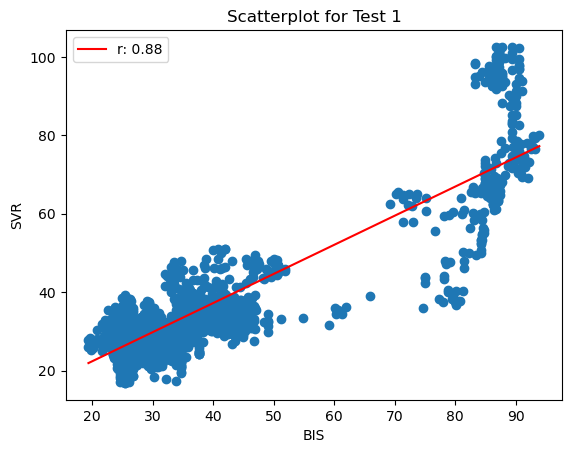

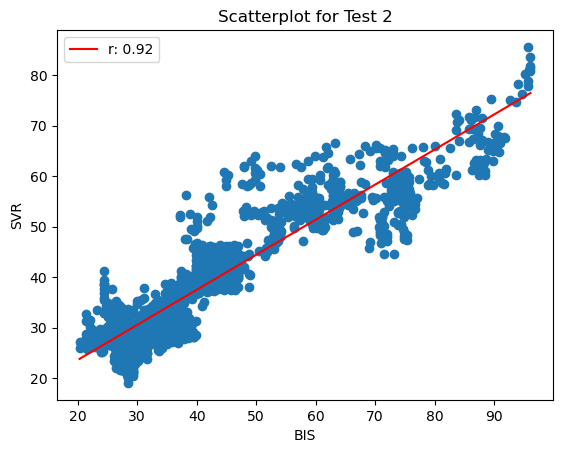

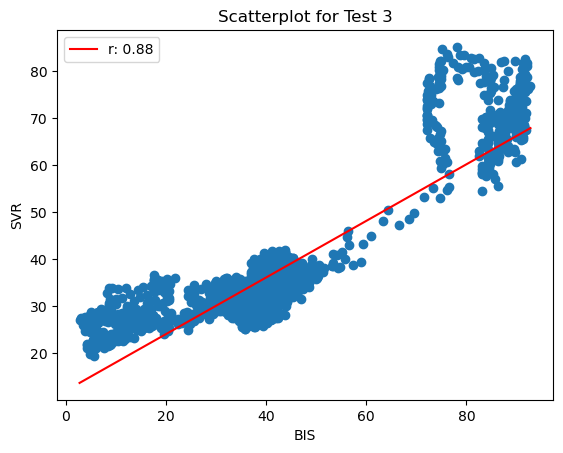

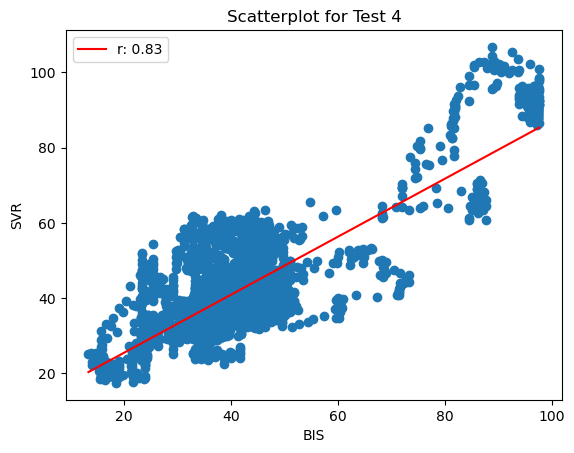

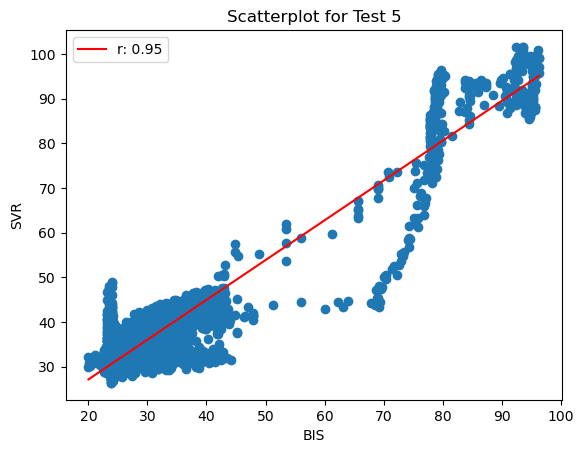

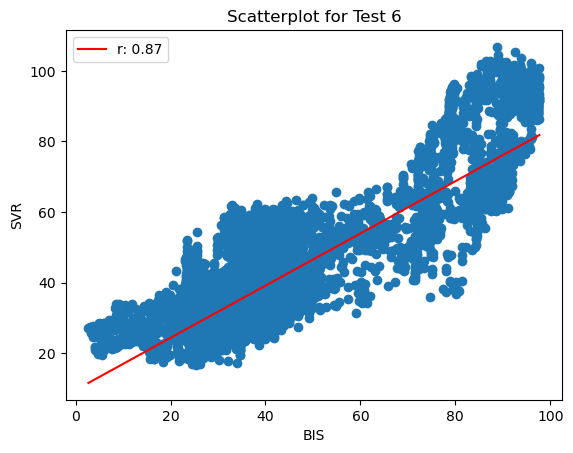

In [24]:
for index, test_data in enumerate (test_datasets):
    X_test = test_data[features]
    y_test = test_data['BIS']  
    y_pred = model.predict(X_test)
    slope, intercept, r_value, p_value, std_err = linregress(y_test, y_pred)
    x_range = np.array([y_test.min(), y_test.max()])
    plt.plot(x_range, slope * x_range + intercept, color='red', label=f'r: {round(r_value, 2)}')
    plt.scatter(y_test, y_pred)
    plt.xlabel('BIS')
    plt.ylabel('SVR')
    plt.title(f'Scatterplot for Test {index+1}' )
    plt.legend()
    plt.show()
    

### Create Bland-Altman plot

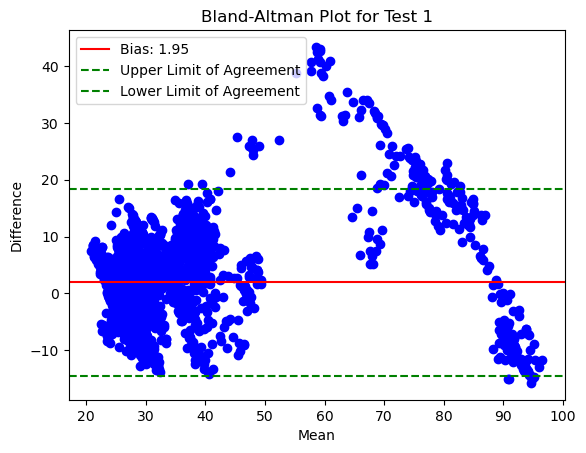

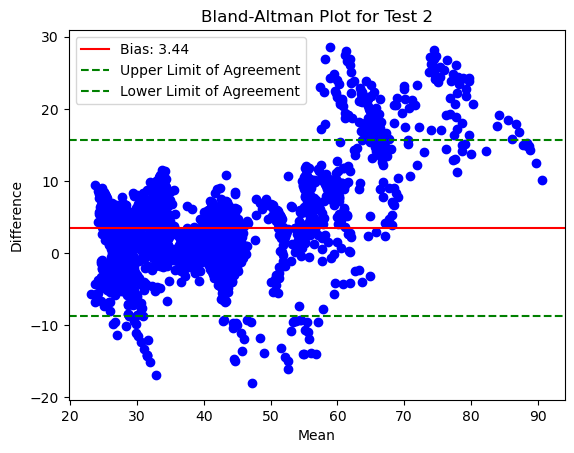

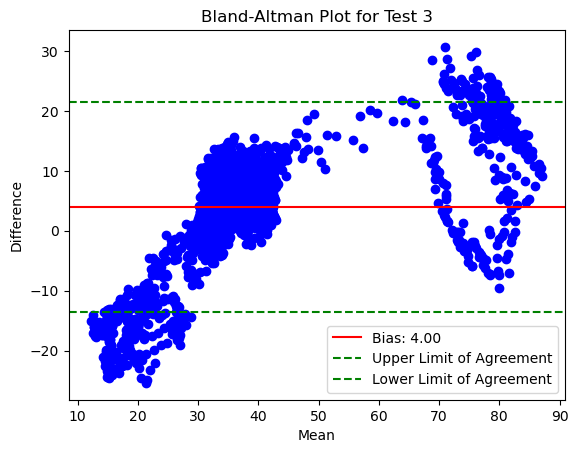

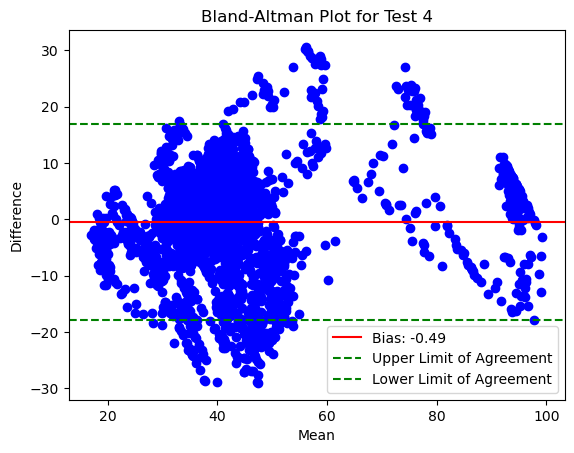

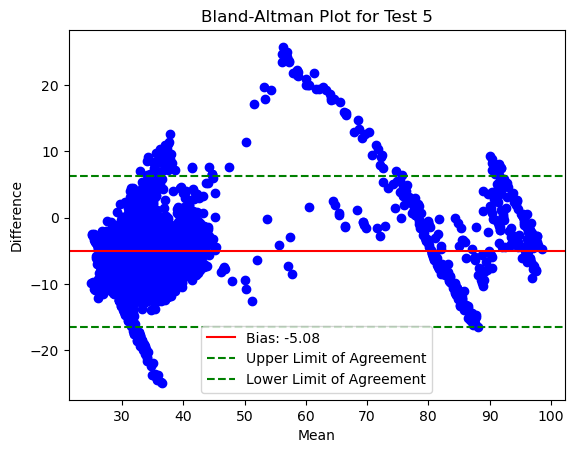

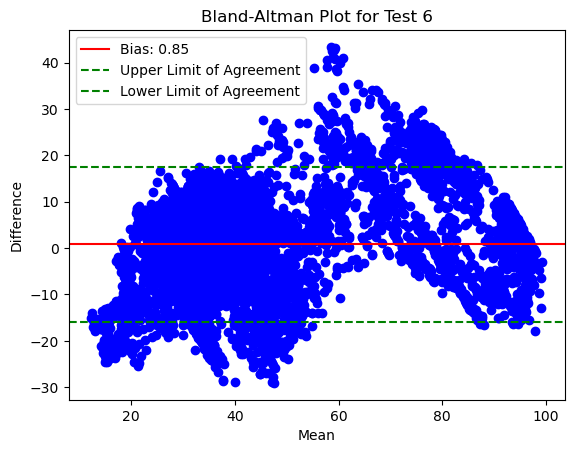

In [25]:
for index, test_data in enumerate (test_datasets):
    X_test = test_data[features]
    y_test = test_data['BIS']  
    y_pred = model.predict(X_test)

    
    residuals = y_test - y_pred # Calculate residuals

    # The Bland-Altman Plot
    bias = np.mean(residuals)
    limits_of_agreement = 1.96 * np.std(residuals)

    plt.scatter((y_pred + y_test) / 2, residuals, color='blue')
    plt.axhline(mean_difference, color='red', linestyle='-', label=f'Bias: {bias:.2f}')
    plt.axhline(mean_difference + limits_of_agreement, color='green', linestyle='--', label='Upper Limit of Agreement')
    plt.axhline(mean_difference - limits_of_agreement, color='green', linestyle='--', label='Lower Limit of Agreement')
    plt.xlabel('Mean')
    plt.ylabel('Difference')
    plt.title(f'Bland-Altman Plot for Test {index+1}')
    plt.legend()
    plt.show()


    


### Visualize the new index with BIS

Normalized New Index:
[25.0985824  27.3773968  25.23485413 23.18360298 23.78522059]


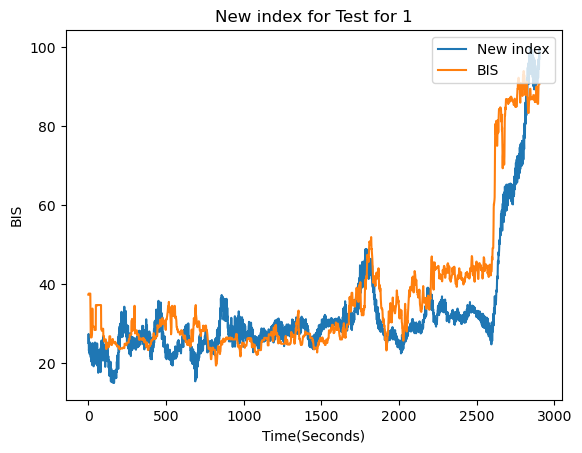

Normalized New Index:
[100.          94.1206312   95.10543833  97.35071533  94.54370095]


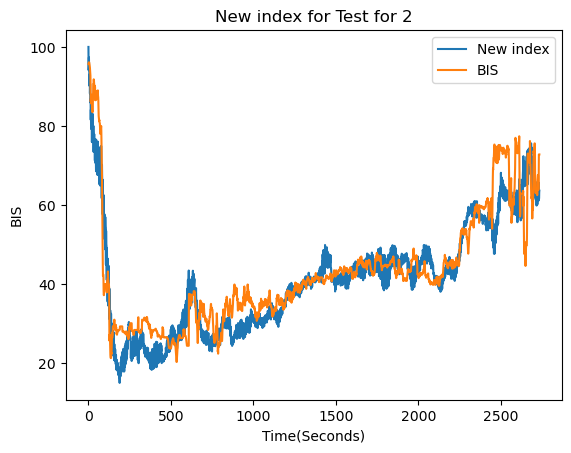

Normalized New Index:
[96.62521195 94.44645701 97.02574276 93.46333359 90.10131627]


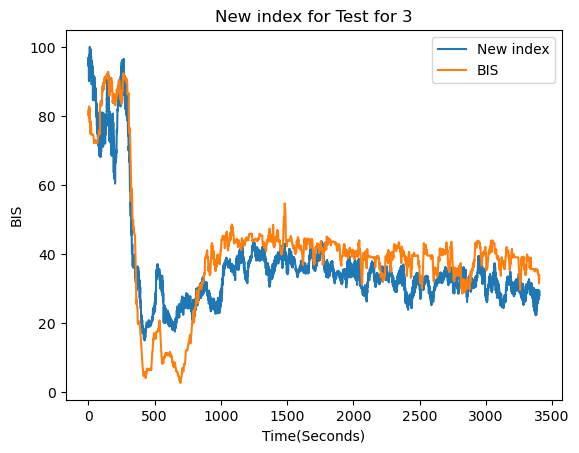

Normalized New Index:
[86.63319178 86.7844949  89.56106891 88.28439201 88.48606836]


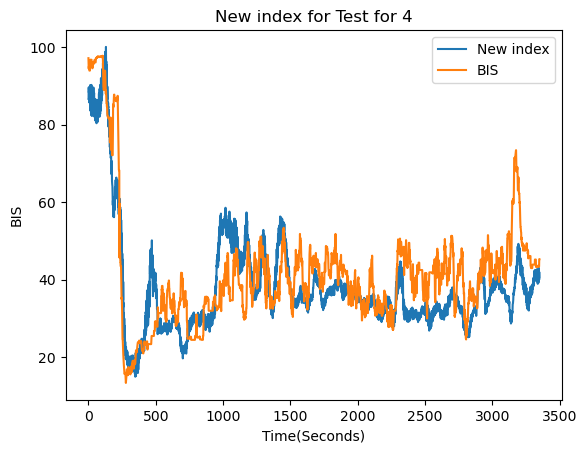

Normalized New Index:
[93.05717782 93.20040391 96.26406948 89.21499236 92.61174113]


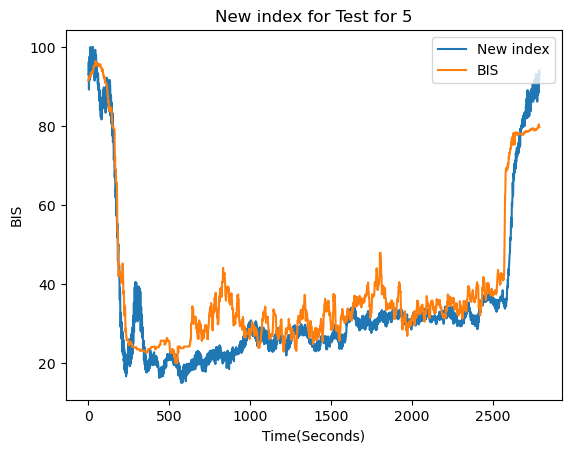

Normalized New Index:
[24.62788014 26.80047735 24.75780015 22.8021593  23.37573508]


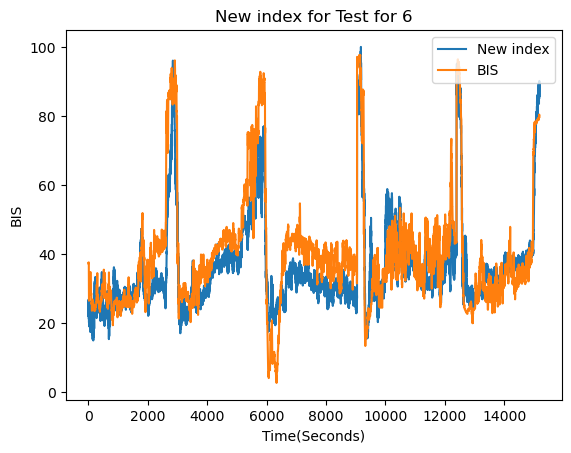

In [26]:
for index, test_data in enumerate (test_datasets):
    X_test = test_data[features]
    y_test = test_data['BIS']  
    y_pred = model_svr.predict(X_test)

   
    scaler = MinMaxScaler(feature_range=(15, 100)) 
    new_index_norm = scaler.fit_transform(y_pred.reshape(-1, 1)).flatten()  # Normalize the new index

    
    print("Normalized New Index:")
    print(new_index_norm[:5]) #display first 5 data of the new index

    plt.plot(new_index_norm, label='New index')
    plt.plot(y_test,label ="BIS")
    plt.title(f"New index for Test for {index+1}")
    plt.ylabel('BIS')
    plt.xlabel('Time(Seconds)')
    plt.legend(loc="upper right")
    plt.show()
